## Exploratory plots of narwhal acoustic presence and environmental data

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# import narwhal acoustic detection data
detections_dir = "D:/Habitat_model_data/narwhal_detections/"

# Kong Oscar 2019 data - ST and AURAL
KO19_narwhal_ST_det    = pd.read_csv(detections_dir + 'Nuussuaq_KongOscar_ST_daily.csv')
KO19_narwhal_aural_det = pd.read_csv(detections_dir + 'Nuussuaq_KongOscar_AuralM2_daily.csv')

# Rink 2018 - AURAL
rink18_narwhal_aural_det = pd.read_csv(detections_dir + 'Rink_Glacier_2018-19_AuralM2_daily.csv')

# Fisher Islands/Rink - ST and AURAL
fisher19_narwhal_ST_det    = pd.read_csv(detections_dir + 'Rink_Glacier_Fischer_ST_daily.csv')
fisher19_narwhal_aural_det = pd.read_csv(detections_dir + 'Rink_Glacier_Fischer_AuralM2_daily.csv')

In [3]:
def csv_to_datetime(detections_csv):
    date_time_str = detections_csv['Time_UTC'].tolist()
    dates = []
    for date in date_time_str:
        tmp = datetime.strptime(date, '%Y/%b/%d %H:%M:%S')
        dates.append(np.datetime64(tmp))
    dates_array = np.array(dates)
    return dates_array

### Kong Oscar

In [4]:
KO_ST_dates_array = csv_to_datetime(KO19_narwhal_ST_det)
KO_ST_narwhal_det_array = KO19_narwhal_ST_det['narwhal'].to_numpy()

KO_ST_narwhal_dates = KO_ST_dates_array[KO_ST_narwhal_det_array == 1] # identify dates when narwhal were detected

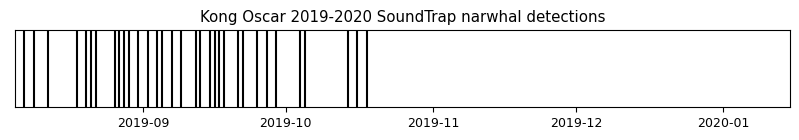

In [5]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 9

for xcoord in KO_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
plt.yticks([])
plt.title('Kong Oscar 2019-2020 SoundTrap narwhal detections');

In [6]:
KO_aural_dates_array = csv_to_datetime(KO19_narwhal_aural_det)
KO_aural_narwhal_det_array = KO19_narwhal_aural_det['narwhal'].to_numpy()

KO_aural_narwhal_dates = KO_aural_dates_array[KO_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

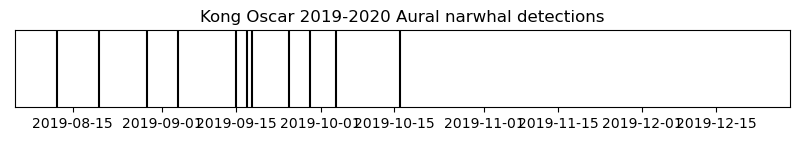

In [9]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in KO_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(KO_aural_dates_array[0], KO_aural_dates_array[-1])
plt.yticks([])
plt.title('Kong Oscar 2019-2020 Aural narwhal detections');

### Rink

In [10]:
rink_aural_dates_array = csv_to_datetime(rink18_narwhal_aural_det)
rink_aural_narwhal_det_array = rink18_narwhal_aural_det['narwhal'].to_numpy()

rink_aural_narwhal_dates = rink_aural_dates_array[rink_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

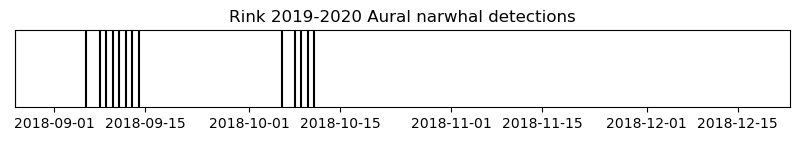

In [11]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in rink_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(rink_aural_dates_array[0], rink_aural_dates_array[-1])
plt.yticks([])
plt.title('Rink 2019-2020 Aural narwhal detections');

### Fisher Islands

In [12]:
fisher_ST_dates_array = csv_to_datetime(fisher19_narwhal_ST_det)
fisher_ST_narwhal_det_array = fisher19_narwhal_ST_det['narwhal'].to_numpy()

fisher_ST_narwhal_dates = fisher_ST_dates_array[fisher_ST_narwhal_det_array == 1] # identify dates when narwhal were detected

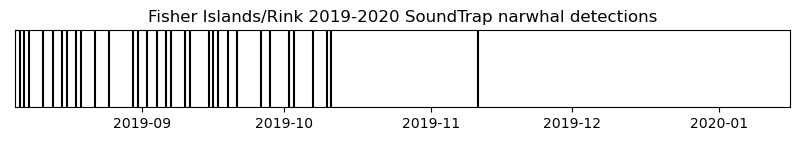

In [13]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_ST_dates_array[0], fisher_ST_dates_array[-1])
plt.yticks([])
plt.title('Fisher Islands/Rink 2019-2020 SoundTrap narwhal detections');

In [14]:
fisher_aural_dates_array = csv_to_datetime(fisher19_narwhal_aural_det)
fisher_aural_narwhal_det_array = fisher19_narwhal_aural_det['narwhal'].to_numpy()

fisher_aural_narwhal_dates = fisher_aural_dates_array[fisher_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

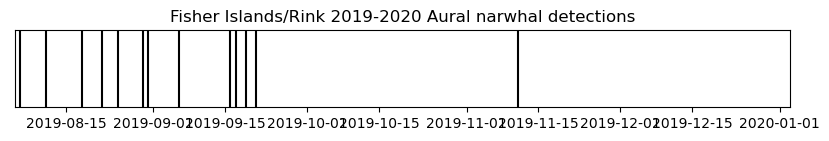

In [15]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_aural_dates_array[0], fisher_aural_dates_array[-1])
plt.yticks([])
plt.title('Fisher Islands/Rink 2019-2020 Aural narwhal detections');

In [21]:
print(KO_ST_narwhal_det_array.sum())
print(KO_aural_narwhal_det_array.sum())
print(fisher_ST_narwhal_det_array.sum())
print(fisher_aural_narwhal_det_array.sum())
print(rink_aural_narwhal_det_array.sum())

33
11
32
13
14


### Plot glacier length and area

In [2]:
# Plot glacier data from Taryn - csv spreadsheet
glacier_data_xl = pd.ExcelFile("D:/Habitat_model_data/glacier_terminus/glacier_data_seasonal.xlsx")

print(glacier_data_xl.sheet_names)

sver_df = glacier_data_xl.parse(glacier_data_xl.sheet_names[0])
ko_df = glacier_data_xl.parse(glacier_data_xl.sheet_names[1])
rink_df = glacier_data_xl.parse(glacier_data_xl.sheet_names[2])

['Sverdrup', 'Kong Oscar', 'Rink']


In [5]:
rink_df

,Unnamed: 0,date,area (km2),length (km)
0,0,1973-03-20,56.979998,16.897666
1,1,1974-04-20,56.863374,16.863081
2,2,1975-10-03,55.670658,16.509376
3,3,1981-03-24,56.233440,16.676272
4,4,1981-09-19,54.505828,16.163941
...,...,...,...,...
112,112,2021-08-05,45.555861,13.509789
113,113,2021-09-04,45.609638,13.525737
114,114,2021-10-04,45.598505,13.522435
115,115,2021-11-03,45.556287,13.509915


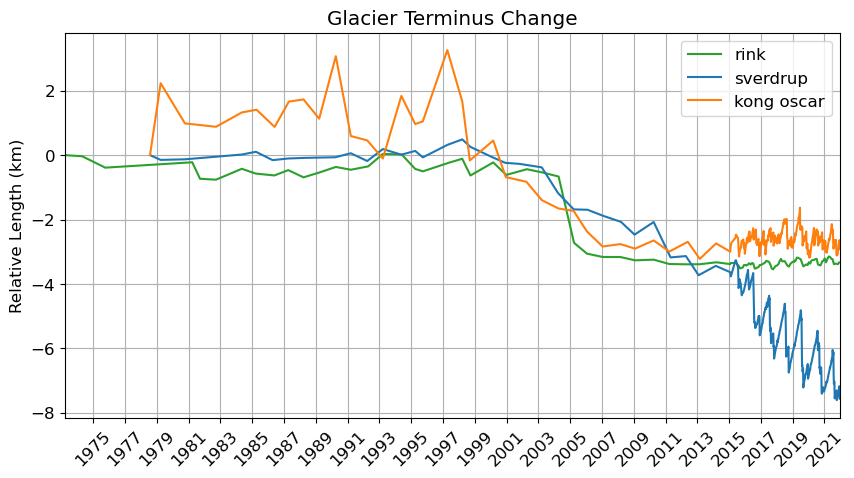

In [38]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_df.date, rink_df['length (km)']-rink_df['length (km)'][0], label='rink', color='tab:green')
plt.plot(sver_df.date, sver_df['length (km)']-sver_df['length (km)'][0], label='sverdrup', color='tab:blue')
plt.plot(ko_df.date, ko_df['length (km)']-ko_df['length (km)'][0], label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change')
plt.ylabel("Relative Length (km)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

In [68]:
rink_df.date[68:93]

68   2018-01-05
69   2018-02-04
70   2018-03-06
71   2018-04-05
72   2018-05-05
73   2018-06-04
74   2018-07-04
75   2018-08-03
76   2018-09-08
77   2018-10-08
78   2018-11-07
79   2018-12-07
80   2019-01-06
81   2019-02-05
82   2019-02-17
83   2019-03-07
84   2019-04-06
85   2019-05-06
86   2019-06-05
87   2019-07-05
88   2019-08-04
89   2019-09-03
90   2019-10-03
91   2019-11-08
92   2019-12-08
Name: date, dtype: datetime64[ns]

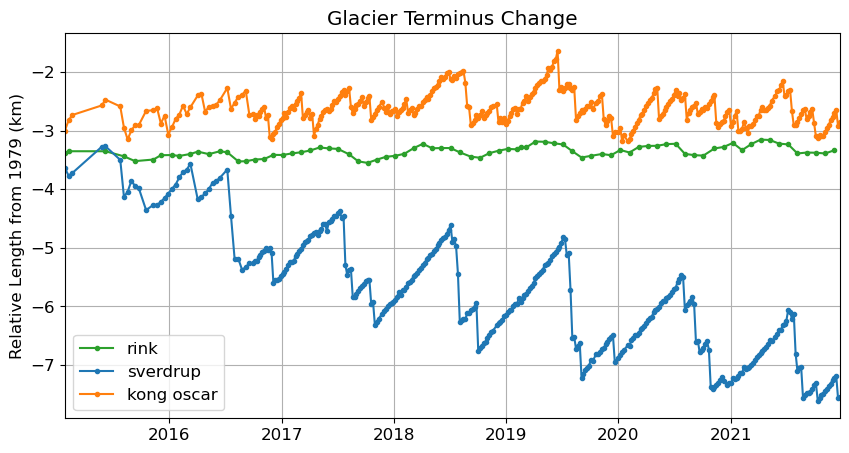

In [39]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_df.date[37:], rink_df['length (km)'][37:]-rink_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_df.date[34:], sver_df['length (km)'][34:]-sver_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_df.date[35:], ko_df['length (km)'][35:]-ko_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change')
plt.ylabel("Relative Length from 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

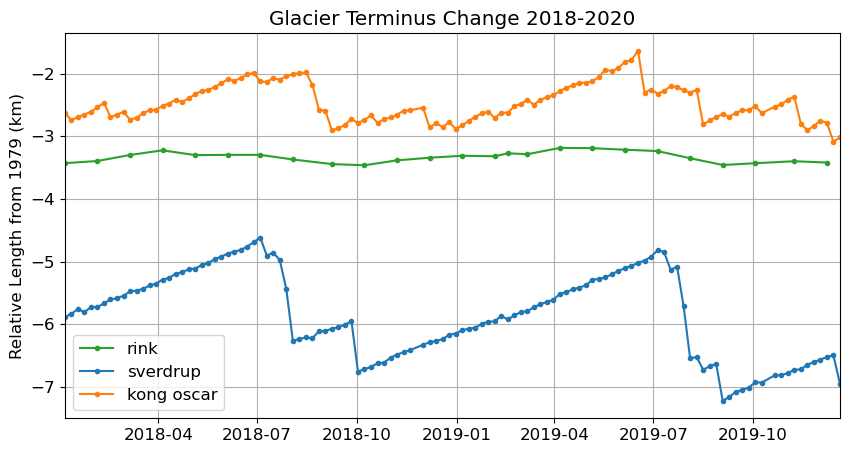

In [73]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_df.date[68:93], rink_df['length (km)'][68:93]-rink_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_df.date[147:265], sver_df['length (km)'][147:265]-sver_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_df.date[148:266], ko_df['length (km)'][148:266]-ko_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change 2018-2020')
plt.ylabel("Relative Length from 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

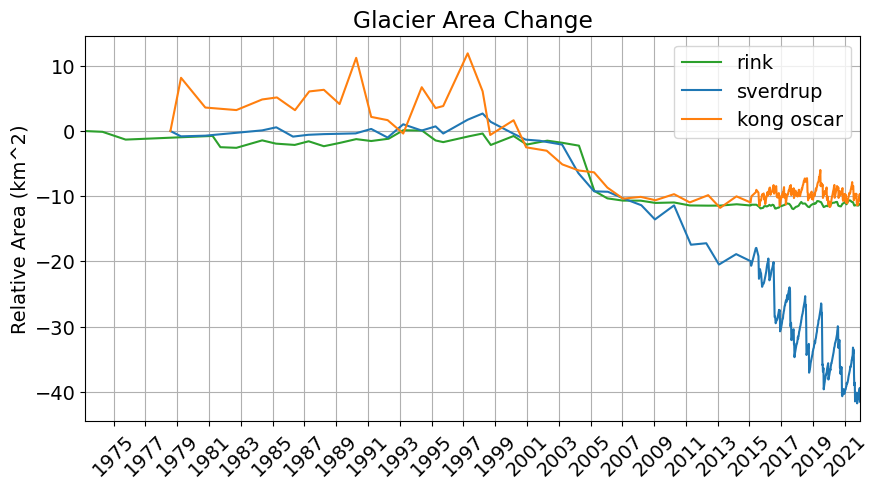

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 14

plt.plot(rink_df.date, rink_df['area (km2)']-rink_df['area (km2)'][0], label='rink', color='tab:green')
plt.plot(sver_df.date, sver_df['area (km2)']-sver_df['area (km2)'][0], label='sverdrup', color='tab:blue')
plt.plot(ko_df.date, ko_df['area (km2)']-ko_df['area (km2)'][0], label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change')
plt.ylabel("Relative Area (km^2)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_area.png", bbox_inches='tight', dpi=300, facecolor='white')

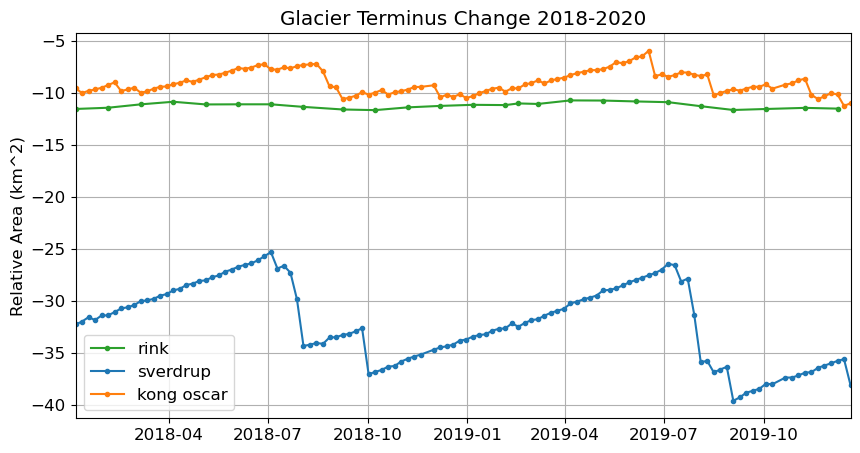

In [72]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_df.date[68:93], rink_df['area (km2)'][68:93]-rink_df['area (km2)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_df.date[147:265], sver_df['area (km2)'][147:265]-sver_df['area (km2)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_df.date[148:266], ko_df['area (km2)'][148:266]-ko_df['area (km2)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change 2018-2020')
plt.ylabel("Relative Area (km^2)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')